# Question 3

In [1]:
rm(list = ls())

In [2]:
library(ISLR2)
library(caret)
library(tidyverse)
library(MASS)

Loading required package: ggplot2

Loading required package: lattice

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


The following object is masked from ‘package:ISLR2’:

    Boston




In [3]:
wage_data <- Wage
dim(wage_data)
head(wage_data)

[1] 3000   11

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.04315
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.47602
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.04315
376662,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,4.845098,127.11574


In [4]:
#checking for the null data 
colSums(is.na(wage_data))

year        age     maritl       race  education     region   jobclass 
         0          0          0          0          0          0          0 
    health health_ins    logwage       wage 
         0          0          0          0

In [5]:
str(wage_data)

'data.frame':	3000 obs. of  11 variables:
 $ year      : int  2006 2004 2003 2003 2005 2008 2009 2008 2006 2004 ...
 $ age       : int  18 24 45 43 50 54 44 30 41 52 ...
 $ maritl    : Factor w/ 5 levels "1. Never Married",..: 1 1 2 2 4 2 2 1 1 2 ...
 $ race      : Factor w/ 4 levels "1. White","2. Black",..: 1 1 1 3 1 1 4 3 2 1 ...
 $ education : Factor w/ 5 levels "1. < HS Grad",..: 1 4 3 4 2 4 3 3 3 2 ...
 $ region    : Factor w/ 9 levels "1. New England",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ jobclass  : Factor w/ 2 levels "1. Industrial",..: 1 2 1 2 2 2 1 2 2 2 ...
 $ health    : Factor w/ 2 levels "1. <=Good","2. >=Very Good": 1 2 1 2 1 2 2 1 2 2 ...
 $ health_ins: Factor w/ 2 levels "1. Yes","2. No": 2 2 1 1 1 1 1 1 1 1 ...
 $ logwage   : num  4.32 4.26 4.88 5.04 4.32 ...
 $ wage      : num  75 70.5 131 154.7 75 ...


In [6]:
corr <- cor(wage_data[, c(10,11)])
corr

,logwage,wage
logwage,1.0000000,0.9506834
wage,0.9506834,1.0000000


Dropping the logwage column as it is the logarithm of the wage value and it is highly correlated

In [7]:
wage <- wage_data[, -10]
dim(wage)
head(wage)

[1] 3000   10

,year,age,maritl,race,education,region,jobclass,health,health_ins,wage
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,75.04315
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,70.47602
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,130.98218
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,154.68529
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,75.04315
376662,2008,54,2. Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,127.11574


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



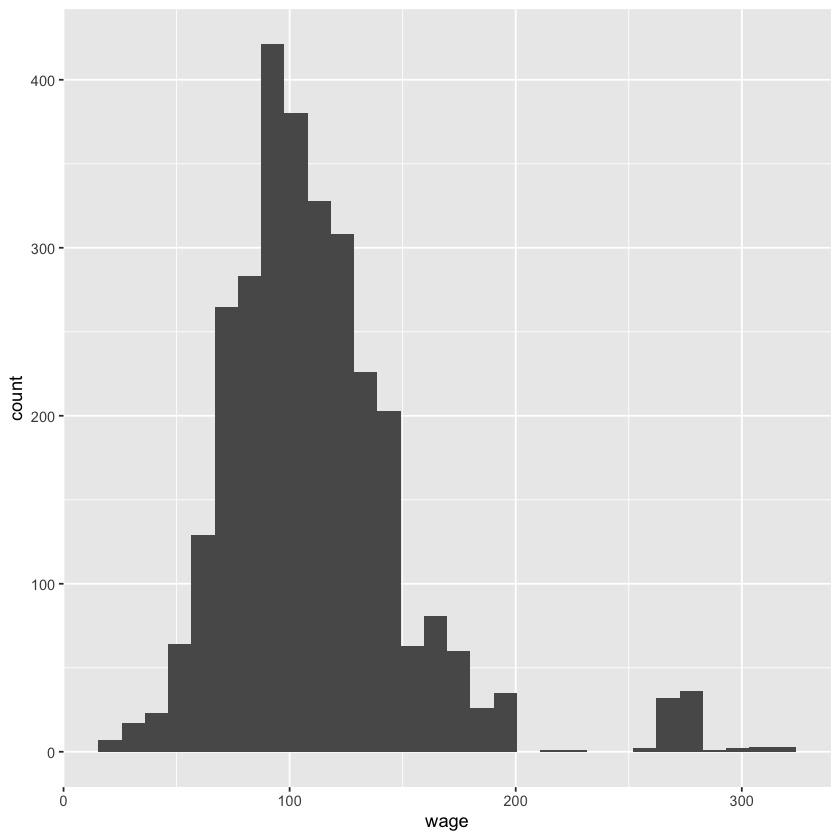

In [8]:
#histogram for wage 
ggplot(wage, aes(x = wage)) + 
geom_histogram()

In [9]:
# quantiles of wage 

qt <- quantile(wage$wage, probs = c(0, 0.25, 0.75, 1))
qt

0%       25%       75%      100% 
 20.08554  85.38394 128.68049 318.34243

In [10]:
 #performing one-hot encoding for the categorical variables 

dummy <- dummyVars(" ~ .", data = wage)
df <- data.frame(predict(dummy, newdata = wage)) 
dim(df)
head(df)

[1] 3000   32

,year,age,maritl.1..Never.Married,maritl.2..Married,maritl.3..Widowed,maritl.4..Divorced,maritl.5..Separated,race.1..White,race.2..Black,race.3..Asian,⋯,region.7..West.South.Central,region.8..Mountain,region.9..Pacific,jobclass.1..Industrial,jobclass.2..Information,health.1....Good,health.2....Very.Good,health_ins.1..Yes,health_ins.2..No,wage
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
231655,2006,18,1,0,0,0,0,1,0,0,⋯,0,0,0,1,0,1,0,0,1,75.04315
86582,2004,24,1,0,0,0,0,1,0,0,⋯,0,0,0,0,1,0,1,0,1,70.47602
161300,2003,45,0,1,0,0,0,1,0,0,⋯,0,0,0,1,0,1,0,1,0,130.98218
155159,2003,43,0,1,0,0,0,0,0,1,⋯,0,0,0,0,1,0,1,1,0,154.68529
11443,2005,50,0,0,0,1,0,1,0,0,⋯,0,0,0,0,1,1,0,1,0,75.04315
376662,2008,54,0,1,0,0,0,1,0,0,⋯,0,0,0,0,1,0,1,1,0,127.11574


In [11]:
# coverting the wage column to 3 categories 

df <- df[, -1]
df$wage <- cut(df$wage, breaks= qt, labels = c("Low", "Med", "High"))
head(df)

,age,maritl.1..Never.Married,maritl.2..Married,maritl.3..Widowed,maritl.4..Divorced,maritl.5..Separated,race.1..White,race.2..Black,race.3..Asian,race.4..Other,⋯,region.7..West.South.Central,region.8..Mountain,region.9..Pacific,jobclass.1..Industrial,jobclass.2..Information,health.1....Good,health.2....Very.Good,health_ins.1..Yes,health_ins.2..No,wage
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
231655,18,1,0,0,0,0,1,0,0,0,⋯,0,0,0,1,0,1,0,0,1,Low
86582,24,1,0,0,0,0,1,0,0,0,⋯,0,0,0,0,1,0,1,0,1,Low
161300,45,0,1,0,0,0,1,0,0,0,⋯,0,0,0,1,0,1,0,1,0,High
155159,43,0,1,0,0,0,0,0,1,0,⋯,0,0,0,0,1,0,1,1,0,High
11443,50,0,0,0,1,0,1,0,0,0,⋯,0,0,0,0,1,1,0,1,0,Low
376662,54,0,1,0,0,0,1,0,0,0,⋯,0,0,0,0,1,0,1,1,0,Med


In [12]:
#3a)

In [13]:
set.seed(150)
index <-  sample(nrow(df), 0.8*nrow(df))
train <- df[index, ]
test <- df[-index, ]
dim(train)
head(train)
dim(test)
head(test)

[1] 2400   31

,age,maritl.1..Never.Married,maritl.2..Married,maritl.3..Widowed,maritl.4..Divorced,maritl.5..Separated,race.1..White,race.2..Black,race.3..Asian,race.4..Other,⋯,region.7..West.South.Central,region.8..Mountain,region.9..Pacific,jobclass.1..Industrial,jobclass.2..Information,health.1....Good,health.2....Very.Good,health_ins.1..Yes,health_ins.2..No,wage
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
232504,59,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,1,1,0,1,0,Med
84663,47,0,1,0,0,0,0,0,1,0,⋯,0,0,0,0,1,0,1,1,0,High
13145,42,0,0,0,1,0,1,0,0,0,⋯,0,0,0,0,1,0,1,1,0,Med
377157,27,1,0,0,0,0,1,0,0,0,⋯,0,0,0,1,0,0,1,1,0,Med
450109,29,0,1,0,0,0,1,0,0,0,⋯,0,0,0,0,1,1,0,1,0,Med
158028,41,1,0,0,0,0,1,0,0,0,⋯,0,0,0,0,1,1,0,1,0,High


[1] 600  31

,age,maritl.1..Never.Married,maritl.2..Married,maritl.3..Widowed,maritl.4..Divorced,maritl.5..Separated,race.1..White,race.2..Black,race.3..Asian,race.4..Other,⋯,region.7..West.South.Central,region.8..Mountain,region.9..Pacific,jobclass.1..Industrial,jobclass.2..Information,health.1....Good,health.2....Very.Good,health_ins.1..Yes,health_ins.2..No,wage
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
161300,45,0,1,0,0,0,1,0,0,0,⋯,0,0,0,1,0,1,0,1,0,High
305706,34,0,1,0,0,0,1,0,0,0,⋯,0,0,0,1,0,0,1,0,1,Low
447660,51,0,1,0,0,0,1,0,0,0,⋯,0,0,0,1,0,0,1,1,0,Med
301585,56,0,1,0,0,0,1,0,0,0,⋯,0,0,0,1,0,1,0,1,0,High
11141,40,0,0,0,1,0,1,0,0,0,⋯,0,0,0,0,1,0,1,0,1,Low
378472,57,0,1,0,0,0,1,0,0,0,⋯,0,0,0,1,0,0,1,0,1,Med


In [14]:
#setting up model controls
library(rpart)
model.controls <- rpart.control(minsplit = 25, xval = 10, cp = 0)

In [15]:
#classification tree
fit.wage <- rpart(wage ~., data = train, method = 'class', control = model.controls)

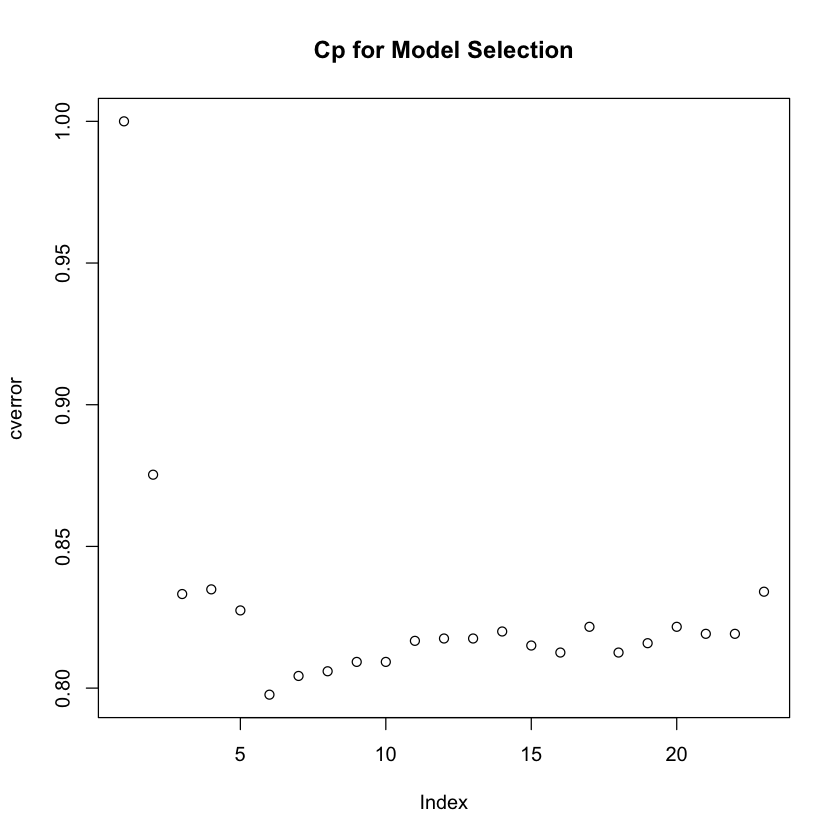

In [16]:
plot(fit.wage$cptable[,4], main = 'Cp for Model Selection', ylab = 'cverror')


In [17]:
#building the pruned model 
min_cp <- which.min(fit.wage$cptable[,4])
pruned.wage <- prune(fit.wage, cp = fit.wage$cptable[min_cp, 1])

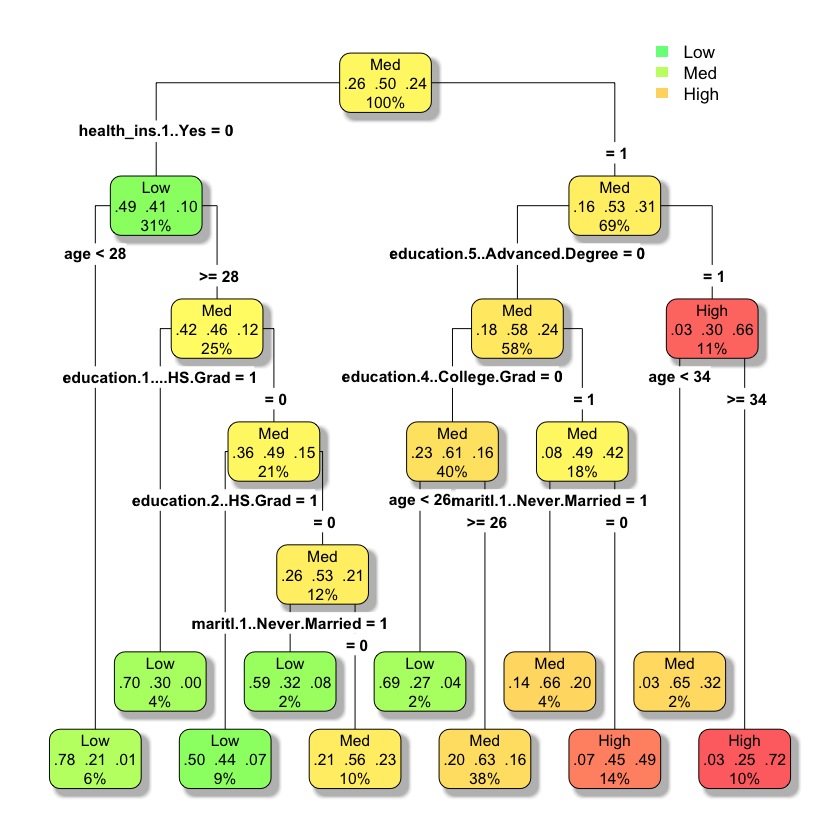

In [37]:
library(rpart.plot)
rpart.plot(pruned.wage, box.palette="GnYlRd", type = 4, shadow.col="gray" ,roundint=TRUE)


In [38]:
#making the predictions for the train and test data 
predict.train <- predict(pruned.wage, newdata = train, type = 'class')
predict.test <- predict(pruned.wage, newdata = test, type = 'class')

In [40]:
#computing train and test errors
error.train <- mean(predict.train != train$wage, na.rm = TRUE)
error.test <- mean(predict.test != test$wage, na.rm = TRUE)

round(error.train, 2)
error.test

[1] 0.39

[1] 0.375

* Decision tree for wage classification is working too good with train error 0.39 and test error 0.375

In [41]:
#checking frame of the pruned tree

frame_details <- pruned.wage$frame
head(frame_details)

,var,n,wt,dev,yval,complexity,ncompete,nsurrogate,yval2
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,"<dbl[,8]>"
1,health_ins.1..Yes,2399,2399,1211,2,0.062345169,4,3,"2, 624, 1188, 587, 0.2601084, 0.4952063, 0.244685286, 1.00000000"
2,age,741,741,381,1,0.026011561,4,1,"1, 360, 305, 76, 0.4858300, 0.4116059, 0.102564103, 0.30887870"
4,<leaf>,139,139,30,1,0.000000000,0,0,"1, 109, 29, 1, 0.7841727, 0.2086331, 0.007194245, 0.05794081"
5,education.1....HS.Grad,602,602,326,2,0.026011561,4,2,"2, 251, 276, 75, 0.4169435, 0.4584718, 0.124584718, 0.25093789"
10,<leaf>,94,94,28,1,0.002477291,0,0,"1, 66, 28, 0, 0.7021277, 0.2978723, 0.000000000, 0.03918299"
11,education.2..HS.Grad,508,508,260,2,0.010734930,4,5,"2, 185, 248, 75, 0.3641732, 0.4881890, 0.147637795, 0.21175490"


In [42]:
library(tidyverse)
terminal_nodes <- frame_details %>% filter(var != '<leaf>')
terminal_nodes 

var,n,wt,dev,yval,complexity,ncompete,nsurrogate,yval2
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,"<dbl[,8]>"
health_ins.1..Yes,2399,2399,1211,2,0.062345169,4,3,"2, 624, 1188, 587, 0.26010838, 0.4952063, 0.2446853, 1.0000000"
age,741,741,381,1,0.026011561,4,1,"1, 360, 305, 76, 0.48582996, 0.4116059, 0.1025641, 0.3088787"
education.1....HS.Grad,602,602,326,2,0.026011561,4,2,"2, 251, 276, 75, 0.41694352, 0.4584718, 0.1245847, 0.2509379"
education.2..HS.Grad,508,508,260,2,0.010734930,4,5,"2, 185, 248, 75, 0.36417323, 0.4881890, 0.1476378, 0.2117549"
maritl.1..Never.Married,286,286,135,2,0.008257638,4,1,"2, 75, 151, 60, 0.26223776, 0.5279720, 0.2097902, 0.1192163"
education.5..Advanced.Degree,1658,1658,775,2,0.062345169,4,0,"2, 264, 883, 511, 0.15922799, 0.5325694, 0.3082027, 0.6911213"
education.4..College.Grad,1389,1389,588,2,0.009909166,4,2,"2, 255, 801, 333, 0.18358531, 0.5766739, 0.2397408, 0.5789912"
age,962,962,372,2,0.009909166,4,0,"2, 220, 590, 152, 0.22869023, 0.6133056, 0.1580042, 0.4010004"
maritl.1..Never.Married,427,427,216,2,0.009909166,4,2,"2, 35, 211, 181, 0.08196721, 0.4941452, 0.4238876, 0.1779908"


* From the above, we can see the number of samples in each node before splitting at that particular terminal node.

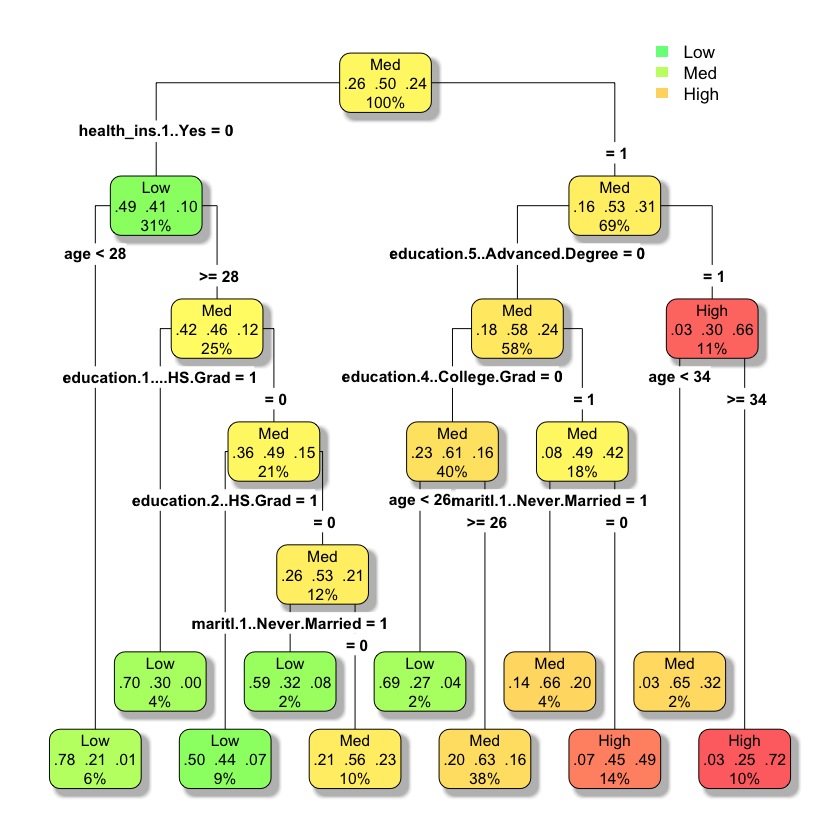

In [43]:
#3b)
rpart.plot(pruned.wage, box.palette="GnYlRd", type = 4, shadow.col="gray" ,roundint=TRUE)


* High wage earners can be categorized as,
  * If the person is having the Advanced Degree and age >= 34.
  * If the person is married.
* With these two condition the high wage earners are categorized as per the decision tree we built.